<a href="https://colab.research.google.com/github/pradhangithub/DIVINE/blob/main/Indian_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
%matplotlib inline

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [143]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import plot_roc_curve


In [144]:
df=pd.read_csv("/content/diabetes (3).csv")

In [145]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


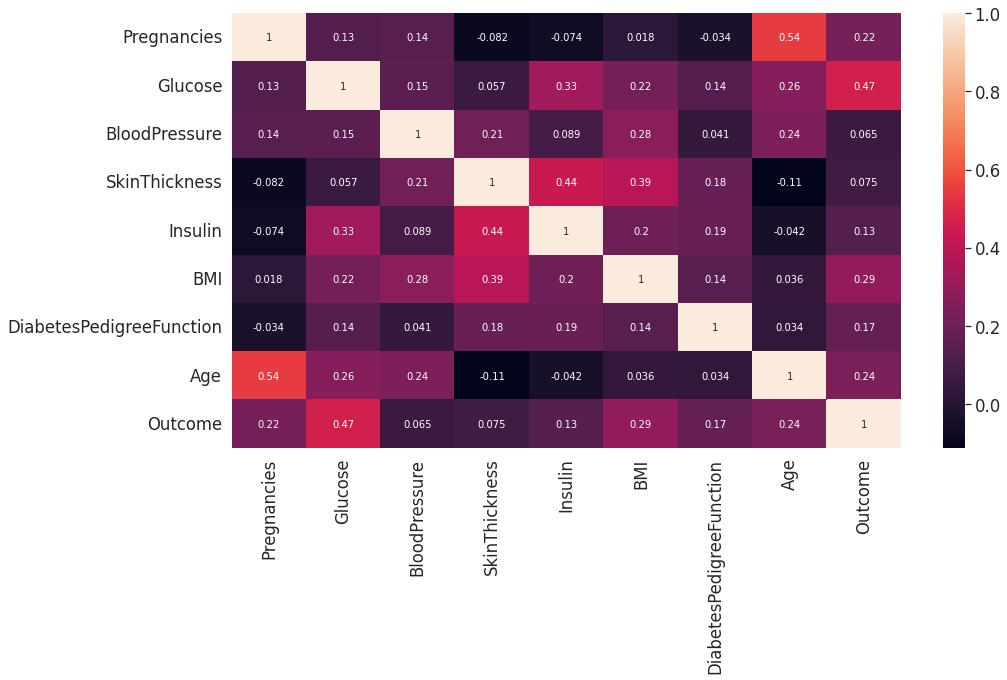

In [146]:
fig , ax =plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap ="rocket")

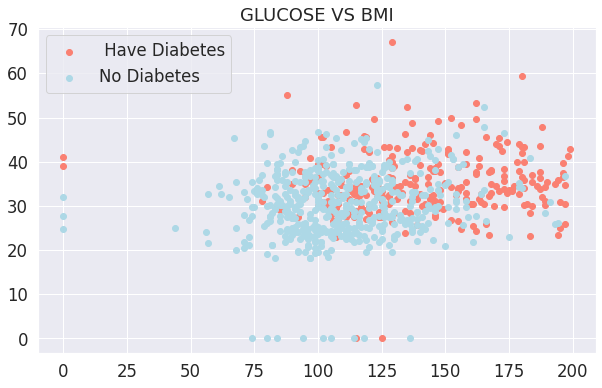

In [147]:
plt.figure(figsize=(10, 6))
plt.scatter(df. Glucose[df. Outcome==1],  df.BMI[df.Outcome==1], c="salmon")
plt.scatter(df.Glucose[df.Outcome==0], df.BMI[df.Outcome==0], c="lightblue")

plt.title("GLUCOSE VS BMI")

plt.legend([" Have Diabetes", "No Diabetes"]);

In [148]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

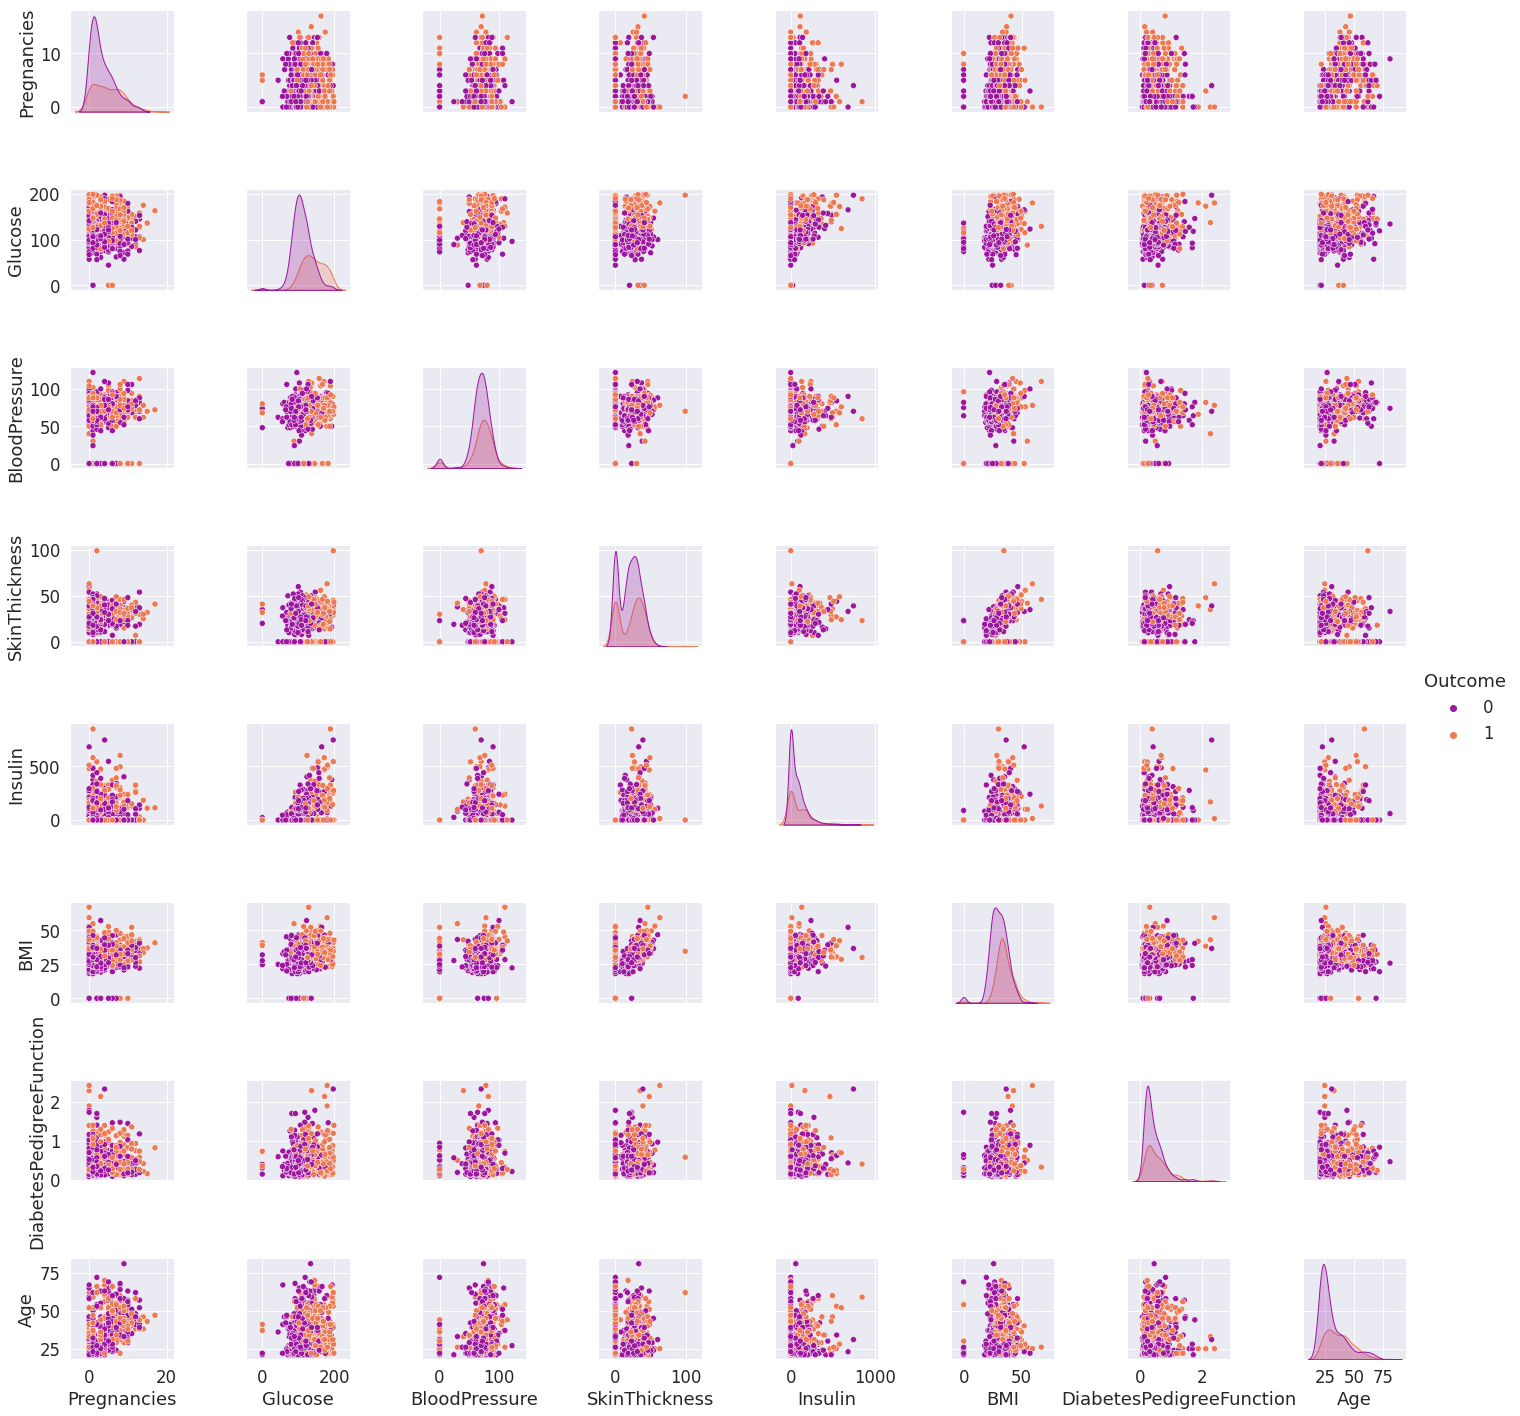

In [149]:
sns.pairplot(df , hue="Outcome" , palette ="plasma")

In [150]:
x = df.drop("Outcome" , axis=1)

y = df["Outcome"]

In [151]:
np.random.seed(42)

x_train ,x_test, y_train, y_test = train_test_split (x,y,test_size= 0.2)

In [152]:
models = {"Logistic Regression": LogisticRegression(solver="liblinear"), "KNN": KNeighborsClassifier(),  "Random Forest": RandomForestClassifier(), "gnb": GaussianNB(), "decision_tree": DecisionTreeClassifier(random_state=0, max_depth=2)}
def fit_and_score(models, x_train, x_test, y_train, y_test):
  
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [153]:
model_scores = fit_and_score( models= models,
                             x_train= x_train,
                             x_test= x_test,
                             y_train= y_train,
                             y_test= y_test)
model_scores

{'Logistic Regression': 0.7597402597402597}

In [154]:
np.random.seed(42)
cv_acc_log = cross_val_score(LogisticRegression(), x, y, cv=20, scoring="accuracy").mean()
cv_acc_gnb =cross_val_score(GaussianNB(), x, y, cv=20, scoring="accuracy").mean()
cv_acc_dtc =cross_val_score(DecisionTreeClassifier(random_state=0, max_depth=2), x, y, cv=20, scoring="accuracy").mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [155]:
cross_val = {" Logisticregression" : cv_acc_log , "Gaussiannb" :cv_acc_gnb,  "RandomForestclssifier" : cv_acc_dtc}
cross_val

{' Logisticregression': 0.7644736842105264,
 'Gaussiannb': 0.7540823211875843,
 'RandomForestclssifier': 0.7505398110661268}

In [156]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),  "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid,  cv=5, verbose=True)
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [157]:
gs_log_reg.score(x_test, y_test)

0.7597402597402597

In [158]:
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [159]:
y_test= np.array(y_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


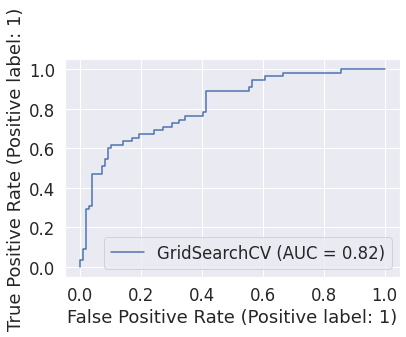

In [160]:
plot_roc_curve(gs_log_reg, x_test, y_test)

In [161]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):

  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                   annot=True,
                   cbar=False,fmt='g')
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)

  plot_conf_mat(y_test, y_preds)

CLASSIFICATION_REPORT FOR LOGISTIC REGRESSION

In [162]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [163]:
def evaluate_preds(y_true, y_preds):
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict = {"accuracy": round(accuracy, 2), "precision": round(precision, 2), "recall": round(recall, 2), "f1": round(f1, 2)}
  print(f"Acc: {accuracy * 100:.2f}%")
  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 score: {f1:.2f}")

  return metric_dict

In [171]:
model1 = GaussianNB().fit(x_train, y_train);

In [172]:
y_preds1 = model1.predict(x_test)
y_preds1

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [167]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
  fig, ax = plt.subplots(figsize=(3, 3))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds1), annot=True, cbar=False, fmt='g')
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

  bottom, top = ax.get_ylim()
  ax.set_ylim(bottom + 0.5, top - 0.5)

  plot_conf_mat(y_test, y_preds1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


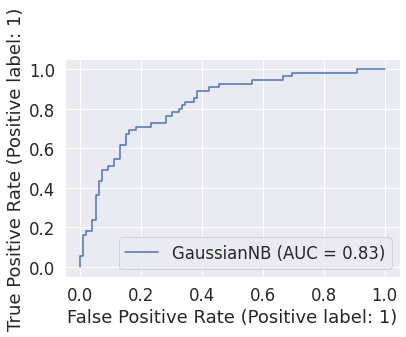

In [169]:
plot_roc_curve(model1, x_test, y_test)

CLASSIFICATION_REPORT FOR GAUSSIANNB

In [170]:
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

